In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Utility function
def plot_map(*polys):
    for poly in polys:
        x,y = poly.exterior.xy
        plt.fill(x,y, "g")
    plt.axis('off')
    plt.show()

# A hard-coded map

> Map is a set of polygons that equal landmass; no polygon means water.

This is cheating, but it's ok in order to show what we are aiming for. A set of polygons and a function to plot them.

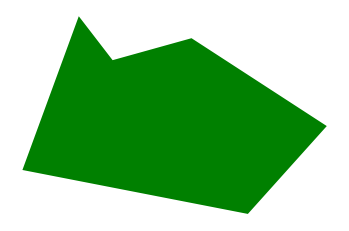

In [9]:
# Basic hardcoded polygon map

poly = Polygon([
    (1.5,4.5),
    (1,1),
    (3,0),
    (3.7,2),
    (2.5,4),
    (1.8,3.5)
])

plot_map(poly)

# Noise points to polygons

A basic recipe with two steps:

1. Generate set of noisy points
    - e.g. uniform, gaussian or moon
2. Apply a point-to-polygon algorithm
    - Convex hull
    - Concave hull, e.g. alphashape
    - Voronoi
    - Delaunay triangulation
    - Find islands via Clustering algorithms:
        - DBScan
        - K-means
    
Note that clustering algorithms don't yield polygons, but they can be used to identify points on the same "island".

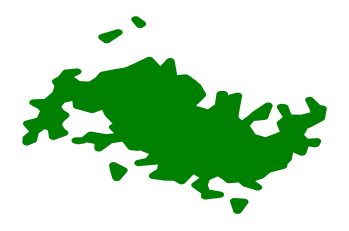

In [50]:
# Alpha-shape map (non-layered)
import alphashape
import numpy as np
from sklearn.datasets import make_moons, make_blobs
N_POINTS = 499
ALPHA = 2.5
RANDOM_STATE = 0
BUFFER = 0.2

blobs_params = dict(random_state=RANDOM_STATE, n_samples=N_POINTS, n_features=2)
# https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html
points = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=[2.5, .3],
               **blobs_params)[0]
points += make_moons(n_samples=N_POINTS, noise=.1, random_state=RANDOM_STATE)[0] * 4
    
# https://pypi.org/project/alphashape/
polys = alphashape.alphashape(points, ALPHA)
# smooth with buffer
polys = polys.buffer(BUFFER)
#polys = polys.buffer(-BUFFER)

# plot polygons
plot_map(*polys)